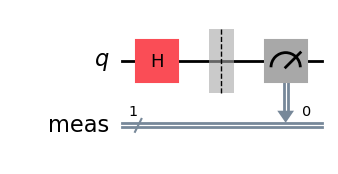

In [84]:
from qiskit.circuit.library import HGate
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_aer import AerSimulator

# Quantencircuit erstellen
hadamard_gate = HGate()
circuit = QuantumCircuit(1)
circuit.append(hadamard_gate, [0])
circuit.measure_all()

circuit.draw("mpl")

In [85]:
# Set up different observables.
 
observables_labels = ["I", "Z", "X"]
observables = [SparsePauliOp(label) for label in observables_labels]

In [86]:
 
# Use the following code instead if you want to run on a simulator:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2
backend = AerSimulator(method='extended_stabilizer')
estimator = Estimator(backend)
 
# Convert to an ISA circuit and layout-mapped observables.
 
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circuit)
mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]
 
job = estimator.run([(isa_circuit, mapped_observables)])
result = job.result()
 
# This is the result of the entire submission.  You submitted one Pub,
# so this contains one inner result (and some metadata of its own).
 
job_result = job.result()
 
# This is the result from our single pub, which had five observables,
# so contains information on all five.
 
pub_result = job.result()[0]
print(pub_result.data.evs)
print(pub_result.data.stds)
print(backend.num_qubits)

[ 1.         -0.015625   -0.00732422]
[0.         0.01562309 0.01562458]
63


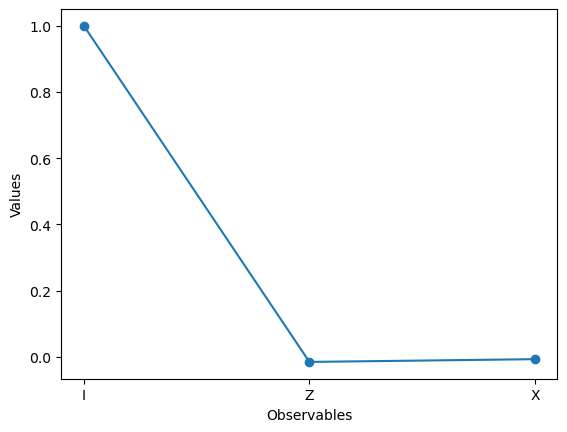

In [87]:
# Plot the result
 
from matplotlib import pyplot as plt
 
values = pub_result.data.evs
 
errors = pub_result.data.stds
 
# plotting graph
plt.plot(observables_labels, values, "-o")
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()

{'1': 4987, '0': 5013}
Result(backend_name='aer_simulator_extended_stabilizer', backend_version='0.17.1', job_id='dd02cbd9-5408-487f-be4a-8a99a3ec10f8', success=True, results=[ExperimentResult(shots=10000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 4987, '0x0': 5013}, memory=['0x1', '0x1', '0x0', '0x0', '0x0', '0x1', '0x1', '0x1', '0x1', '0x0', '0x0', '0x1', '0x1', '0x0', '0x1', '0x1', '0x0', '0x1', '0x0', '0x0', '0x1', '0x1', '0x0', '0x1', '0x0', '0x0', '0x0', '0x1', '0x1', '0x1', '0x1', '0x1', '0x1', '0x0', '0x1', '0x1', '0x1', '0x0', '0x0', '0x1', '0x1', '0x1', '0x1', '0x0', '0x1', '0x0', '0x0', '0x0', '0x1', '0x1', '0x1', '0x1', '0x1', '0x1', '0x0', '0x1', '0x1', '0x0', '0x0', '0x0', '0x0', '0x1', '0x0', '0x1', '0x0', '0x1', '0x0', '0x0', '0x1', '0x1', '0x0', '0x0', '0x0', '0x0', '0x1', '0x1', '0x0', '0x0', '0x0', '0x0', '0x0', '0x0', '0x0', '0x1', '0x0', '0x1', '0x0', '0x0', '0x1', '0x1', '0x1', '0x0', '0x1', '0x1', '0x0', '0x1', '0x0', '0x1', '0x1', '0x1

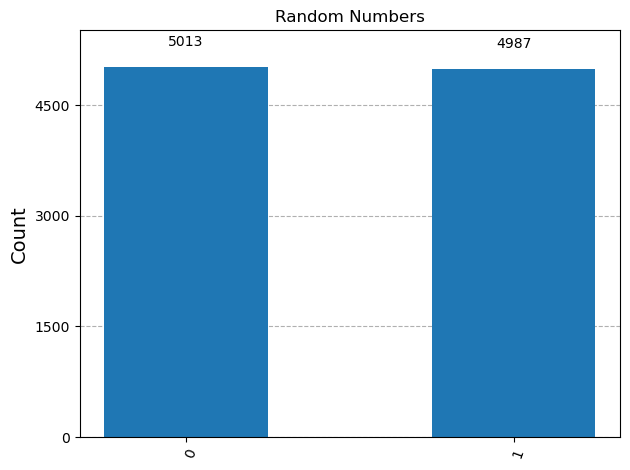

In [88]:
from qiskit.visualization import plot_histogram, plot_state_city
backend = AerSimulator(method='extended_stabilizer')
result = backend.run(circuit, shots = 10000, memory = True).result()
counts = result.get_counts(circuit)
print(counts)
print(result)
memory = result.get_memory(circuit)
plot_histogram(counts, title='Random Numbers')

In [89]:
import csv

# Umwandeln in eine Liste von Listen
memory_rows = [[bit] for bit in memory]
bytes_list = [memory[i:i+8] for i in range(0, len(memory), 8)]

with open("C:/Users/jojot/Documents/Quantum_Computing_Team/ergebnisseIBMBits.csv", "w", newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(memory_rows)
with open("C:/Users/jojot/Documents/Quantum_Computing_Team/ergebnisseIBMBytes.csv", "w", newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(bytes_list)


In [90]:
import csv

# Mit Nullen auffüllen, damit die Länge durch 8 teilbar ist
if len(memory) % 8 != 0:
    memory += ['0'] * (8 - len(memory) % 8)

# In 8er-Gruppen (Bytes) unterteilen
bytes_list = [memory[i:i+8] for i in range(0, len(memory), 8)]

# Bytes zu Dezimalzahlen umwandeln
decimal_values = [int(''.join(byte), 2) for byte in bytes_list]

# In CSV schreiben
with open("C:/Users/jojot/Documents/Quantum_Computing_Team/ergebnisseIBMDezimal.csv", "w", newline='') as csvfile:
    writer = csv.writer(csvfile)
    for value in decimal_values:
        writer.writerow([value])  # Eine Dezimalzahl pro Zeile


In [91]:
from PIL import Image
import math

# Auffüllen auf Vielfaches von 8
if len(memory) % 8 != 0:
    memory += ['0'] * (8 - len(memory) % 8)

# In 8er-Blöcke teilen
bytes_list = [memory[i:i+8] for i in range(0, len(memory), 8)]

# In Dezimalzahlen (0–255) umwandeln
decimal_values = [int(''.join(byte), 2) for byte in bytes_list]

# Bilddimensionen bestimmen
width = math.ceil(math.sqrt(len(decimal_values)))
height = math.ceil(len(decimal_values) / width)

# Werte auffüllen, falls nötig
decimal_values += [0] * (width * height - len(decimal_values))

# Graustufenbild erzeugen
img = Image.new("L", (width, height))
img.putdata(decimal_values)

# 💥 Skalieren (10x)
scale_factor = 10
new_size = (width * scale_factor, height * scale_factor)
img_scaled = img.resize(new_size, resample=Image.NEAREST)  # Kein Weichzeichnen!

# Speichern
img_scaled.save("C:/Users/jojot/Documents/Quantum_Computing_Team/bytes_visualisiert.png")


In [95]:
rgb_values = [(0, 255 - val, val // 2) for val in decimal_values]

# Bild erstellen (RGB-Modus)
imrgb = Image.new("RGB", (width, height))
imrgb.putdata(rgb_values)

# 💥 Skalieren (10x)
scale_factor = 10
new_size = (width * scale_factor, height * scale_factor)
img_scaled = imrgb.resize(new_size, resample=Image.NEAREST)  # Kein Weichzeichnen!

# Speichern
img_scaled.save("C:/Users/jojot/Documents/Quantum_Computing_Team/bytes_visualisiert_rgb.png")